In [ ]:
---
title: "Seaborn with Matplotlib"
#author: "JustY"
#date: '날짜'
categories:
  - study
output: 
  html_document:
    keep_md: true
marp: false
---

# seaborn + matplotlib

출처: [Pega Devlog](https://jehyunlee.github.io/2020/09/30/Python-DS-34-seaborn_matplotlib/)

- seaborn은 matplotlib을 쉽고 아름답게 쓰고자 만들어졌다.
 - 따라서 seaborn의 결과물은 당연히 matplotlib의 결과물이다.
 - 그러나 간혹 seaborn이 그린 그림의 폰트, 색상에 접근이 되지 않아서 난처하다.
 - seaborn의 구조를 잘 이해하지 못하면 해결도 어렵다.
- v0.11 기준으로 seaborn에는 다음과 같은 함수들이 있다.

  ![seaborn functions](https://user-images.githubusercontent.com/72365720/98201051-34f2eb00-1f72-11eb-8e45-aafa0f39653b.png)


- matplotlib의 출력물은 `figure`와 `axes(축)`만을 반환한다.
 - seaborn의 명령어 중 `axes`를 반환하는 것들은 matplotlib와 섞어 쓰기 좋다.
 - 먼저 matplotlib의 객체 지향 `object oriented` interface를 사용해서 그림의 틀을 만든 뒤, 특정 `axes`에 seaborn을 삽입하면 된다.
 - 결론적으로, 하고 싶은 것이 다 된다.

## Load data

- 예제로 사용할 펭귄 데이터를 불러온다. (이 데이터는 seaborn에 내장되어 있다.)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Pandas에서 나오는 경고문 무시
import warnings
warnings.filterwarnings('ignore')

penguins = sns.load_dataset("penguins")
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


## figure and axes

- matplotlib으로 도화지(figure)를 깔고, 축공간(axes)을 만든다.
- 1 * 2 축공간을 구성한다.

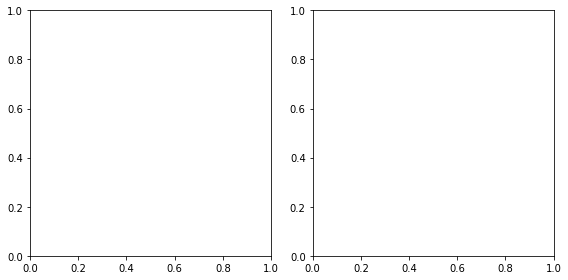

In [ ]:
fig, axes = plt.subplots(ncols = 2, figsize = (8, 4))
fig.tight_layout()

## plot with matplotlib

- matplotlib 기능을 이용해서 산점도를 그린다.
 - x축은 부리 길이(bill length)
 - y축은 부리 위 아래 두께(bill depth)
 - 색상은 종(species)으로 한다. (Adelie, Chinstrap, Gentoo가 있다.)
- 두 축공간 중 왼쪽에만 그린다.

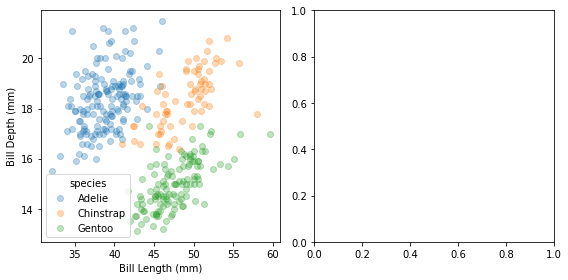

In [ ]:
fig, axes = plt.subplots(ncols = 2, figsize = (8, 4))

species_u = penguins["species"].unique()

# plot 0: matplotlib
for i, s in enumerate(species_u):
    axes[0].scatter(penguins["bill_length_mm"].loc[penguins["species"] == s],
                    penguins["bill_depth_mm"].loc[penguins["species"] == s],
                    c = f"C{i}", label = s, alpha = 0.3
                    )
axes[0].legend(species_u, title = "species")
axes[0].set_xlabel("Bill Length (mm)")
axes[0].set_ylabel("Bill Depth (mm)")

fig.tight_layout()

## plot with seaborn

> [*seaborn.scatterplot*](https://seaborn.pydata.org/generated/seaborn.scatterplot.html)

- 이번엔 같은 plot을 seaborn으로 그려보자.
- 위 코드에 아래 세 줄만 추가한다.

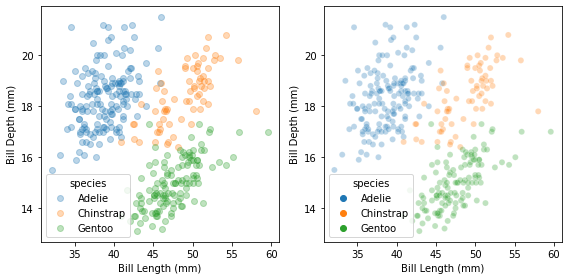

In [ ]:
fig, axes = plt.subplots(ncols = 2, figsize = (8, 4))

species_u = penguins["species"].unique()

for i, s in enumerate(species_u):
    axes[0].scatter(penguins["bill_length_mm"].loc[penguins["species"] == s],
                    penguins["bill_depth_mm"].loc[penguins["species"] == s],
                    c = f"C{i}", label = s, alpha = 0.3
                    )
axes[0].legend(species_u, title = "species")
axes[0].set_xlabel("Bill Length (mm)")
axes[0].set_ylabel("Bill Depth (mm)")

# plot 1: seaborn
sns.scatterplot("bill_length_mm", "bill_depth_mm", hue="species", data=penguins, alpha=0.3, ax=axes[1])
axes[1].set_xlabel("Bill Length (mm)")
axes[1].set_ylabel("Bill Depth (mm)")

fig.tight_layout()

- 단 3줄로 거의 동일한 그림이 나왔다.
 - scatter plot의 점 크기가 살짝 작다.
 - label의 투명도가 살짝 다르다.
- seaborn 명령어 scatterplot() 를 그대로 사용했다.
- x축과 y축 label도 바꾸었다.
 - `ax = axes[1]` 인자에서 볼 수 있듯, 존재하는 `axes`에 그림만 얹었다.
 - matplotlib 틀 + seaborn 그림 이므로, matplotlib 명령이 모두 통한다.

## matplotlib + seaborn & seaborn + matplotlib

- matplotlib와 seaborn이 자유롭게 섞일 수 있다.
 - matplotlib 산점도 위에 seaborn 추세선을 얹을 수 있다.
 - seaborn 산점도 위에 matplotlib 중심점을 얹을 수 있다.

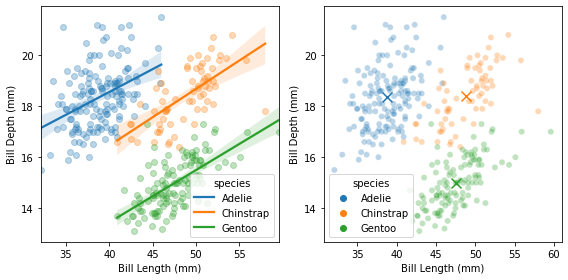

In [ ]:
fig, axes = plt.subplots(ncols = 2, figsize = (8, 4))

species_u = penguins["species"].unique()

# plot 0: matplotlib + seaborn
for i, s in enumerate(species_u):
    # matplotlib 산점도
    axes[0].scatter(penguins["bill_length_mm"].loc[penguins["species"] == s],
                    penguins["bill_depth_mm"].loc[penguins["species"] == s],
                    c = f"C{i}", label = s, alpha = 0.3
                    )
    
    # seaborn 추세선
    sns.regplot("bill_length_mm", "bill_depth_mm", data = penguins.loc[penguins["species"] == s],
                scatter = False, ax = axes[0])

axes[0].legend(species_u, title = "species")
axes[0].set_xlabel("Bill Length (mm)")
axes[0].set_ylabel("Bill Depth (mm)")

# plot 1: seaborn + matplotlib
# seaborn 산점도
sns.scatterplot("bill_length_mm", "bill_depth_mm", hue = "species", data = penguins, alpha = 0.3, ax = axes[1])
axes[1].set_xlabel("Bill Length (mm)")
axes[1].set_ylabel("Bill Depth (mm)")

# matplotlib 중심점
for i, s in enumerate(species_u):
  axes[1].scatter(penguins["bill_length_mm"].loc[penguins["species"] == s].mean(),
                  penguins["bill_depth_mm"].loc[penguins["species"] == s].mean(),
                  c = f"C{i}", alpha = 1, marker = "x", s = 100
                  )

fig.tight_layout()

## seaborn + seaborn + matplotlib

- 안 될 이유가 없다.
- seaborn `scatterplot` + seaborn `kdeplot` + matplotlib `text` 이다.

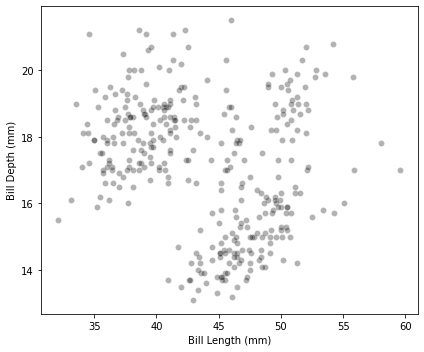

In [ ]:
fig, ax = plt.subplots(figsize = (6, 5))

# plot 0: scatter plot
sns.scatterplot("bill_length_mm", "bill_depth_mm", color = "k", data = penguins, alpha = 0.3, ax = ax, legend = False)

ax.set_xlabel("Bill Length (mm)")
ax.set_ylabel("Bill Depth (mm)")

fig.tight_layout()

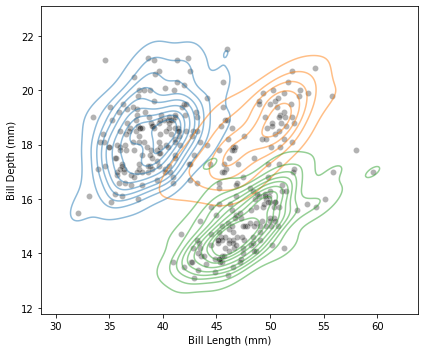

In [ ]:
fig, ax = plt.subplots(figsize = (6, 5))

# plot 0: scatter plot
sns.scatterplot("bill_length_mm", "bill_depth_mm", color = "k", data = penguins, alpha = 0.3, ax = ax, legend = False)

# plot 1: kde plot
sns.kdeplot("bill_length_mm", "bill_depth_mm", hue = "species", data = penguins, alpha = 0.5, ax = ax, legend = False)

ax.set_xlabel("Bill Length (mm)")
ax.set_ylabel("Bill Depth (mm)")

fig.tight_layout()

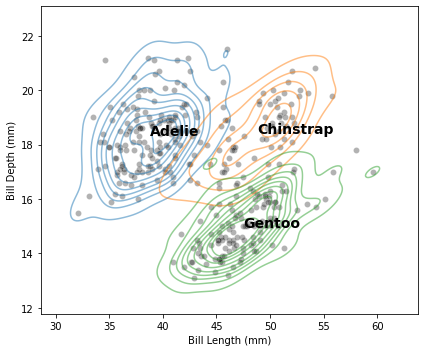

In [ ]:
fig, ax = plt.subplots(figsize = (6, 5))

# plot 0: scatter plot
sns.scatterplot("bill_length_mm", "bill_depth_mm", color = "k", data = penguins, alpha = 0.3, ax = ax, legend = False)

# plot 1: kde plot
sns.kdeplot("bill_length_mm", "bill_depth_mm", hue = "species", data = penguins, alpha = 0.5, ax = ax, legend = False)

# text:
species_u = penguins["species"].unique()
for i, s in enumerate(species_u):
    ax.text(penguins["bill_length_mm"].loc[penguins["species"] == s].mean(),
            penguins["bill_depth_mm"].loc[penguins["species"] == s].mean(),
            s = s, fontdict = {"fontsize": 14, "fontweight": "bold", "color": "k"}
            )

ax.set_xlabel("Bill Length (mm)")
ax.set_ylabel("Bill Depth (mm)")

fig.tight_layout()

## 결론

- seaborn을 matplotlib와 마음껏 섞어쓰자.
- 단, **axes**를 반환하는 명령어에 한해서다.
- 이런 명령어를 **axes-lebel function**이라고 한다.

# seaborn + matplotlib을 이용한 jointplot 보완

- seaborn 의 `jointplot` 은 매력적인 기능이다.
